# Air Quality Index

# Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

# Attribute Information:

# Problem
Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out.

# Objective
So we have to predict the relative humidity based on other parameters.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics


In [2]:
cd F:\ML Project 1\AirQualityUCI

F:\ML Project 1\AirQualityUCI


In [3]:
df = pd.read_csv('AirQuality.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [5]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [6]:
df1=df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)
df1.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
df1.shape

(9357, 15)

In [10]:
df1.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


# putting non-object data type together in numerical_feature

In [11]:
numerical_feature = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 13


In [12]:
print(numerical_feature)

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


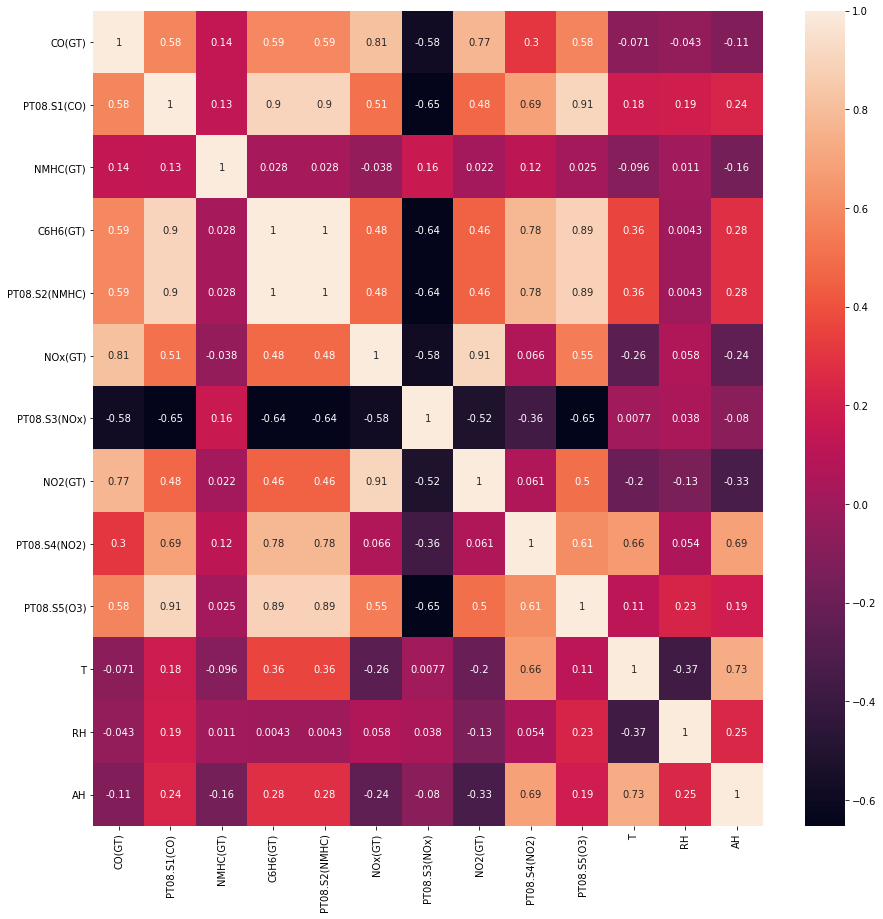

In [13]:
corrmat = df1.corr(method='spearman')
plt.figure(figsize=(15,15))

#plotting heatmap
g=sns.heatmap(corrmat,annot=True)

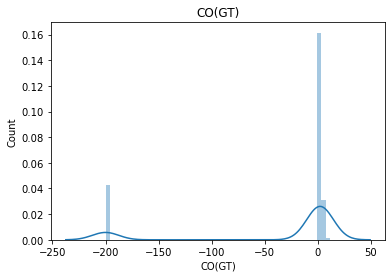

<Figure size 1080x1080 with 0 Axes>

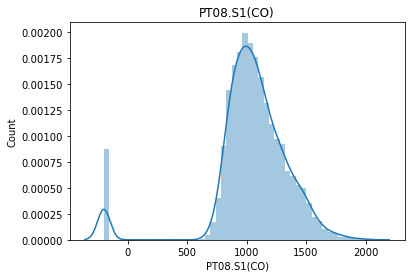

<Figure size 1080x1080 with 0 Axes>

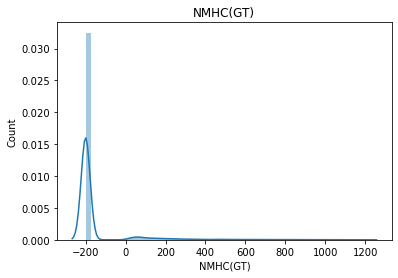

<Figure size 1080x1080 with 0 Axes>

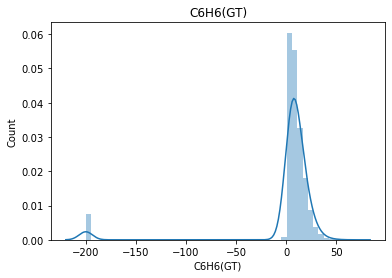

<Figure size 1080x1080 with 0 Axes>

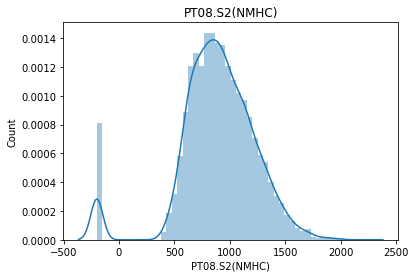

<Figure size 1080x1080 with 0 Axes>

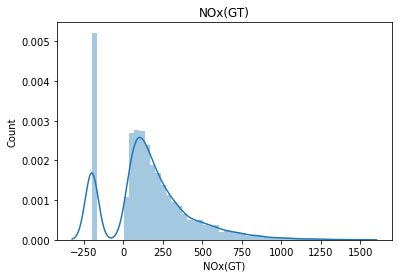

<Figure size 1080x1080 with 0 Axes>

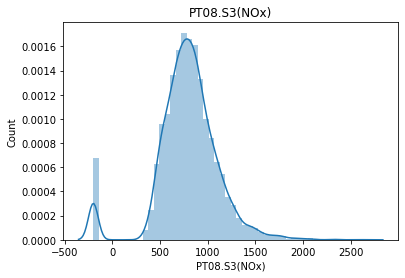

<Figure size 1080x1080 with 0 Axes>

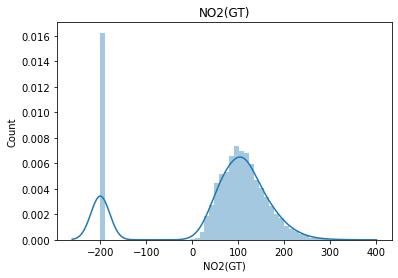

<Figure size 1080x1080 with 0 Axes>

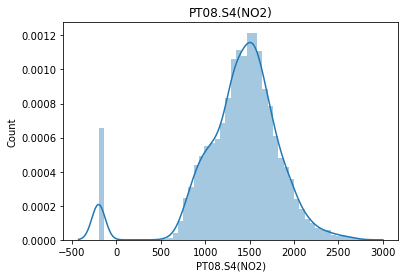

<Figure size 1080x1080 with 0 Axes>

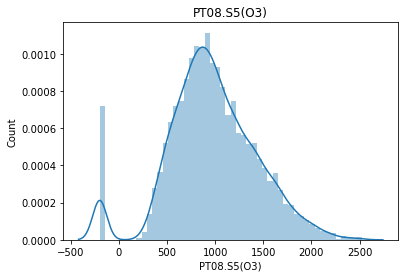

<Figure size 1080x1080 with 0 Axes>

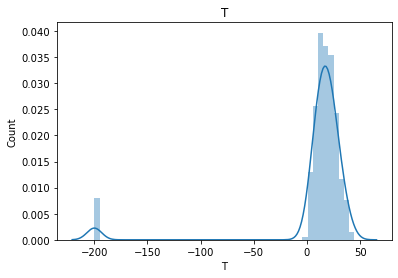

<Figure size 1080x1080 with 0 Axes>

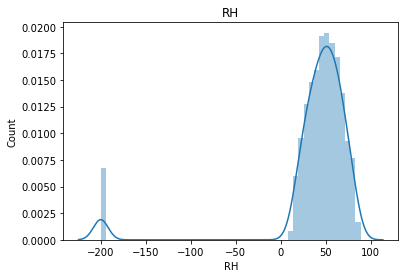

<Figure size 1080x1080 with 0 Axes>

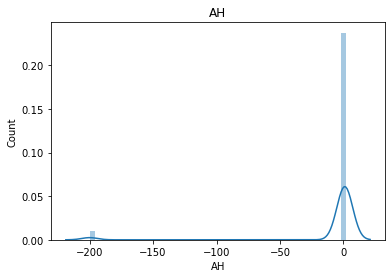

<Figure size 1080x1080 with 0 Axes>

In [14]:
for feature in numerical_feature:
    df2=df1.copy()
    sns.distplot(df1[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# Checking outliers in the data through Boxplot

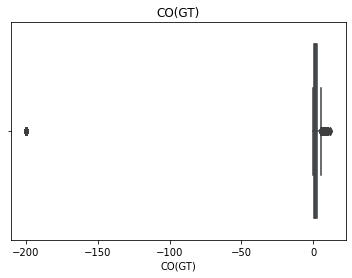

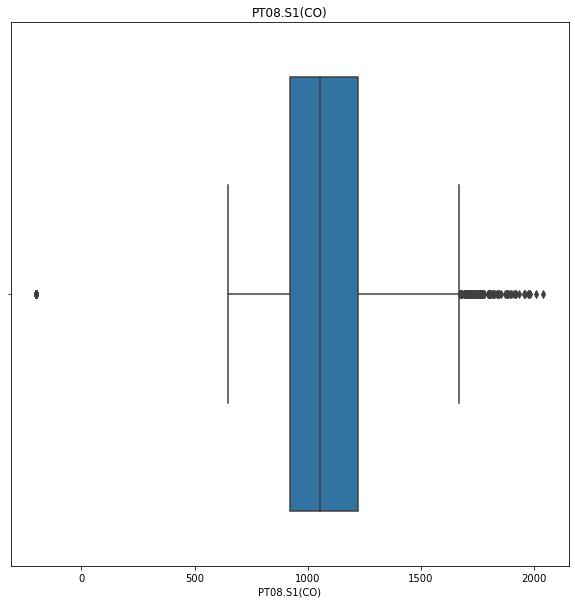

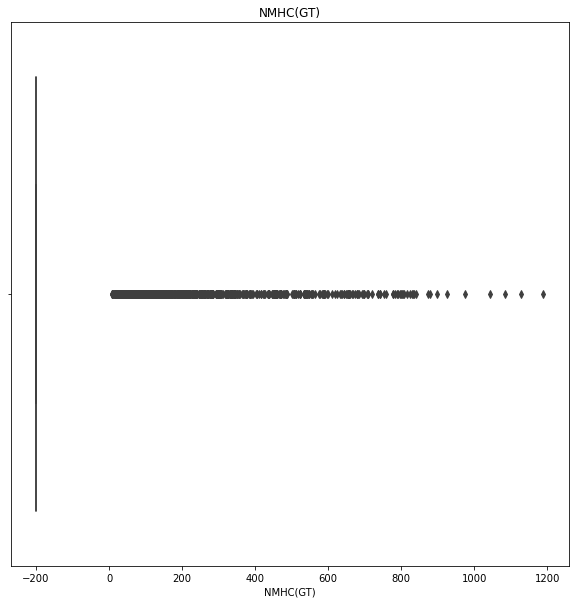

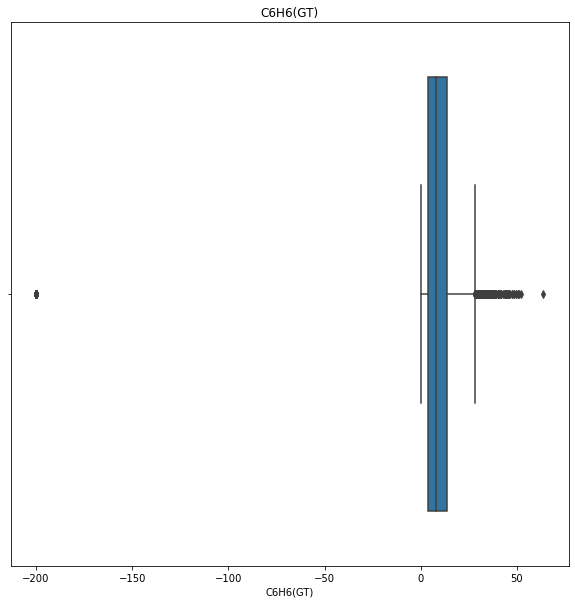

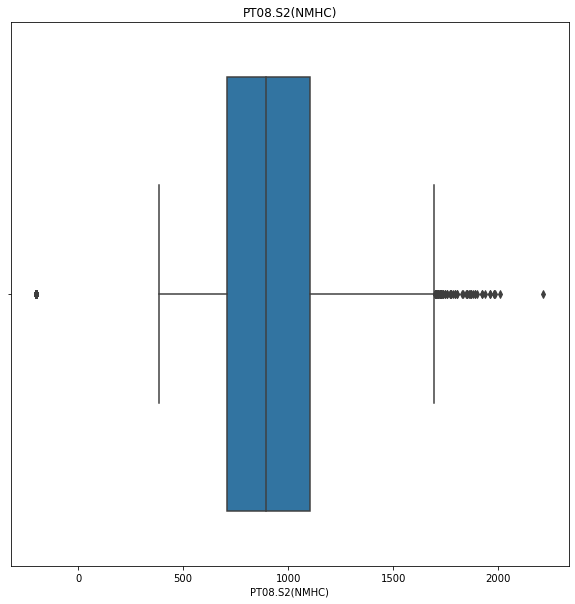

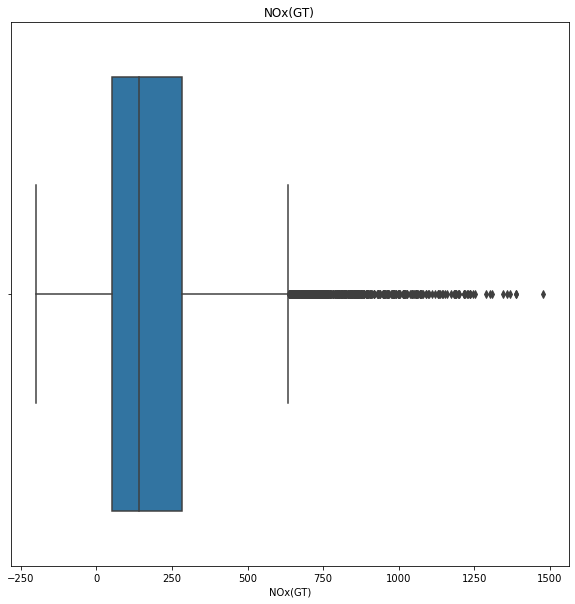

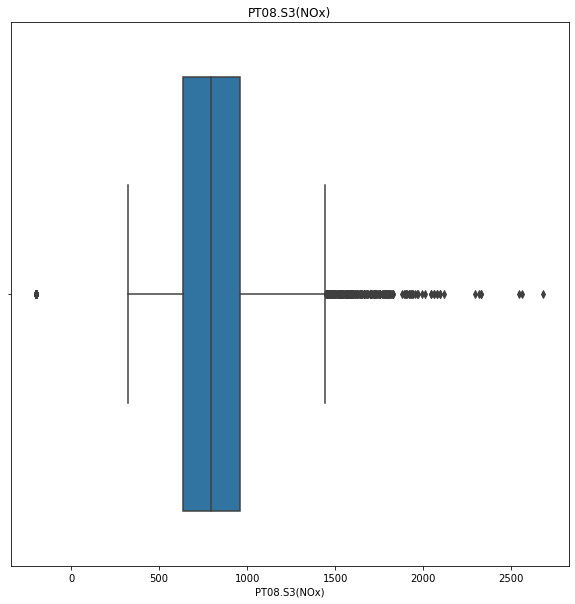

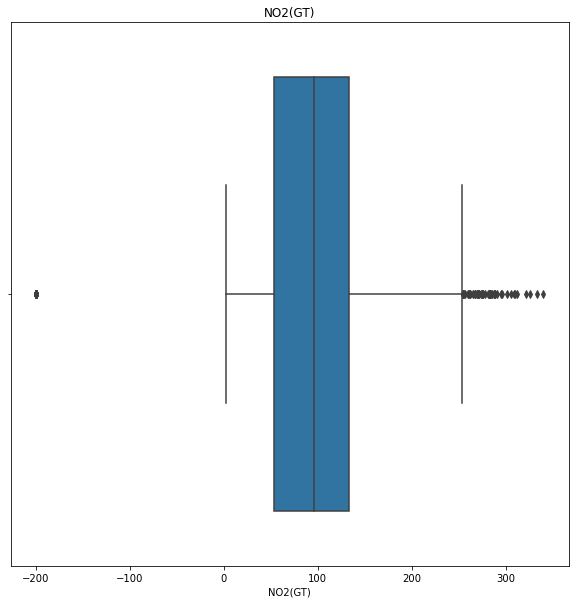

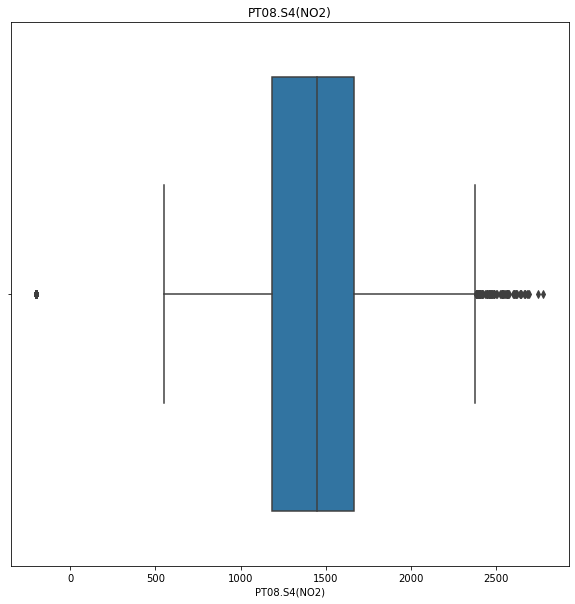

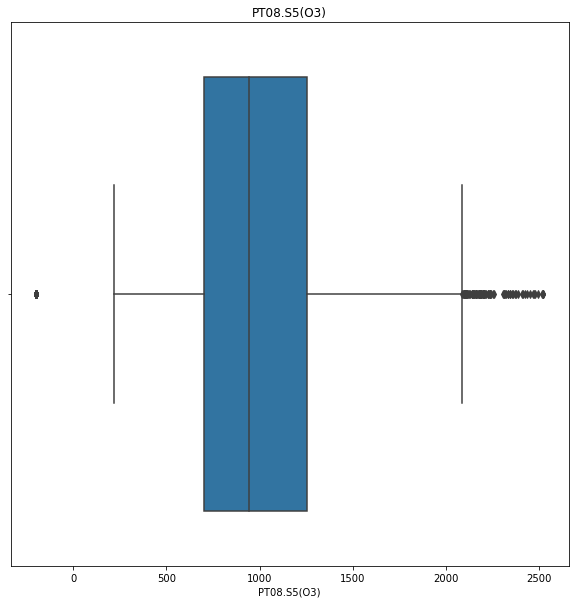

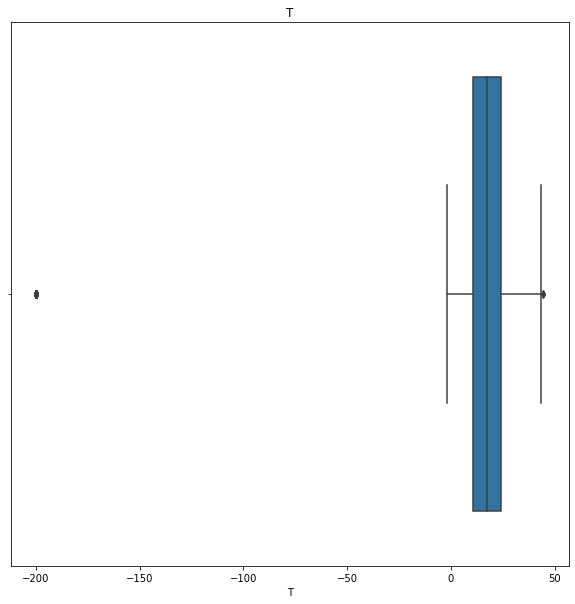

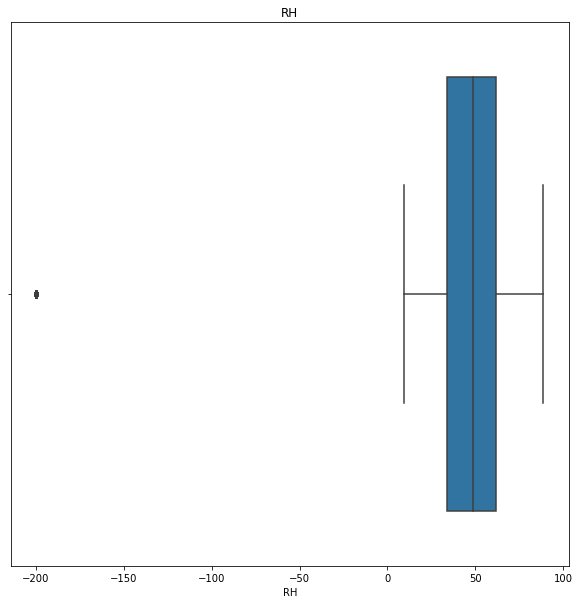

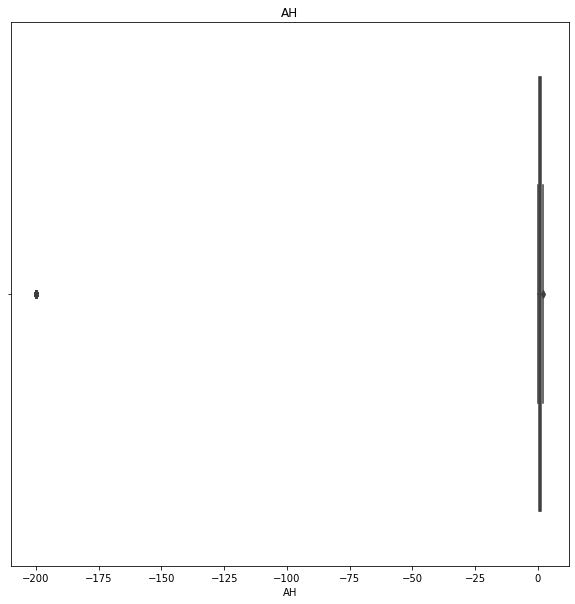

<Figure size 720x720 with 0 Axes>

In [15]:
for feature in numerical_feature:
    df2=df1.copy()
    sns.boxplot(df2[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

# Since there are many outliers as we can see in the boxplots above, removing outliers through IQR(Inter Quantile Range) which is the measure of middle 50% of values when ordered from lowest to highest or where the bulk of data lie.

In [16]:
print(numerical_feature)

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [17]:
IQR=df2.RH.quantile(0.75)-df2.RH.quantile(0.25)
min_thresh=df2.RH.quantile(0.25)-(IQR*1.5)
max_thresh=df2.RH.quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-7.599999999999994 103.6


In [18]:
df2.loc[df2['RH']>=103.6,'RH']=103.6
df2.loc[df2['RH']<=-7.59,'RH']=-7.59

In [19]:
IQR=df2['CO(GT)'].quantile(0.75)-df2['CO(GT)'].quantile(0.25)
min_thresh=df2['CO(GT)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['CO(GT)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-2.4 5.6


In [20]:
df2.loc[df2['CO(GT)']>=5.6,'CO(GT)']=5.6
df2.loc[df2['CO(GT)']<=-2.4,'CO(GT)']=-2.4

In [21]:
IQR=df2['PT08.S1(CO)'].quantile(0.75)-df2['PT08.S1(CO)'].quantile(0.25)
min_thresh=df2['PT08.S1(CO)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['PT08.S1(CO)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

471.0 1671.0


In [22]:
df2.loc[df2['PT08.S1(CO)']>=1671.0,'PT08.S1(CO)']=1671.0
df2.loc[df2['PT08.S1(CO)']<=471.0,'PT08.S1(CO)']=471.0

In [23]:
IQR=df2['NMHC(GT)'].quantile(0.75)-df2['NMHC(GT)'].quantile(0.25)
min_thresh=df2['NMHC(GT)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['NMHC(GT)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-200.0 -200.0


In [24]:
df2.loc[df2['NMHC(GT)']>=-200.0,'NMHC(GT)']=-200.0
df2.loc[df2['NMHC(GT)']<=-200.0,'NMHC(GT)']=-200.0

In [25]:
IQR=df2['C6H6(GT)'].quantile(0.75)-df2['C6H6(GT)'].quantile(0.25)
min_thresh=df2['C6H6(GT)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['C6H6(GT)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-10.399999999999999 28.0


In [26]:
df2.loc[df2['C6H6(GT)']>=28.0,'C6H6(GT)']=28.0
df2.loc[df2['C6H6(GT)']<=-10.39,'C6H6(GT)']=-10.39


In [27]:
IQR=df2['PT08.S2(NMHC)'].quantile(0.75)-df2['PT08.S2(NMHC)'].quantile(0.25)
min_thresh=df2['PT08.S2(NMHC)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['PT08.S2(NMHC)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

120.0 1696.0


In [28]:
df2.loc[df2['PT08.S2(NMHC)']>=103.6,'PT08.S2(NMHC)']=103.6
df2.loc[df2['PT08.S2(NMHC)']<=103.6,'PT08.S2(NMHC)']=103.6

In [29]:
IQR=df2['NOx(GT)'].quantile(0.75)-df2['NOx(GT)'].quantile(0.25)
min_thresh=df2['NOx(GT)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['NOx(GT)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-301.0 635.0


In [30]:
df2.loc[df2['NOx(GT)']>=635.0,'NOx(GT)']=635.0
df2.loc[df2['NOx(GT)']<=-301.0,'NOx(GT)']=-301.0

In [31]:
IQR=df2['PT08.S3(NOx)'].quantile(0.75)-df2['PT08.S3(NOx)'].quantile(0.25)
min_thresh=df2['PT08.S3(NOx)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['PT08.S3(NOx)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

152.5 1444.5


In [32]:
df2.loc[df2['PT08.S3(NOx)']>=1444.5,'PT08.S3(NOx)']=1444.5
df2.loc[df2['PT08.S3(NOx)']<=152.5,'PT08.S3(NOx)']=152.5

In [33]:
IQR=df2['NO2(GT)'].quantile(0.75)-df2['NO2(GT)'].quantile(0.25)
min_thresh=df2['NO2(GT)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['NO2(GT)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-67.0 253.0


In [34]:
df2.loc[df2['NO2(GT)']>=253.0,'NO2(GT)']=253.0
df2.loc[df2['NO2(GT)']<=-67.0,'NO2(GT)']=-67.0

In [35]:
IQR=df2['PT08.S4(NO2)'].quantile(0.75)-df2['PT08.S4(NO2)'].quantile(0.25)
min_thresh=df2['PT08.S4(NO2)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['PT08.S4(NO2)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

469.5 2377.5


In [36]:
df2.loc[df2['PT08.S4(NO2)']>=2377.5,'PT08.S4(NO2)']=2377.5
df2.loc[df2['PT08.S4(NO2)']<=469.5,'PT08.S4(NO2)']=469.5

In [37]:
IQR=df2['PT08.S5(O3)'].quantile(0.75)-df2['PT08.S5(O3)'].quantile(0.25)
min_thresh=df2['PT08.S5(O3)'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['PT08.S5(O3)'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-132.5 2087.5


In [38]:
df2.loc[df2['PT08.S5(O3)']>=2087.5,'PT08.S5(O3)']=2087.5
df2.loc[df2['PT08.S5(O3)']<=-132.5,'PT08.S5(O3)']=-132.5

In [39]:
IQR=df2['T'].quantile(0.75)-df2['T'].quantile(0.25)
min_thresh=df2['T'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['T'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-8.9 43.900000000000006


In [40]:
df2.loc[df2['T']>=43.90,'T']=43.90
df2.loc[df2['T']<=-8.9,'T']=-8.9

In [41]:
IQR=df2['AH'].quantile(0.75)-df2['AH'].quantile(0.25)
min_thresh=df2['AH'].quantile(0.25)-(IQR*1.5)
max_thresh=df2['AH'].quantile(0.75)+(IQR*1.5)
print(min_thresh, max_thresh)

-0.21355000000000002 2.20205


In [42]:
df2.loc[df2['AH']>=2.202,'AH']=2.202
df2.loc[df2['AH']<=-0.2135,'AH']=-0.2135

# Visualizing values through boxplot again to check whether the outliers are present or not 

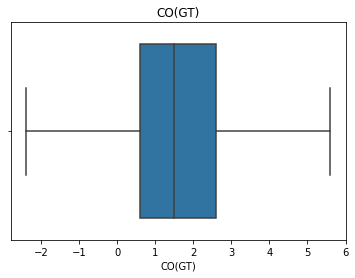

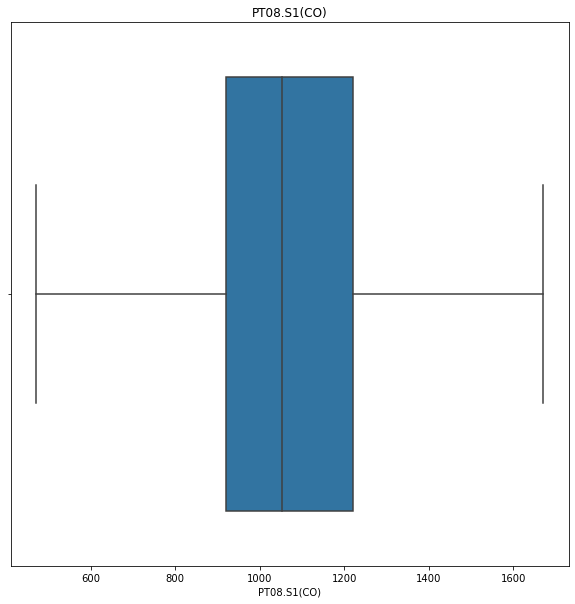

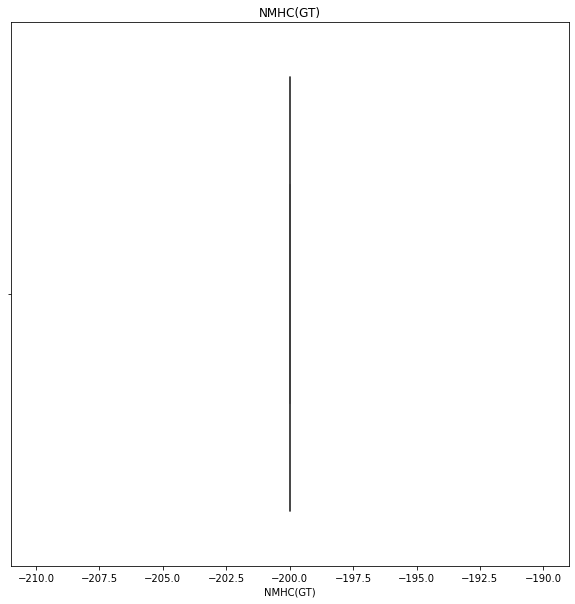

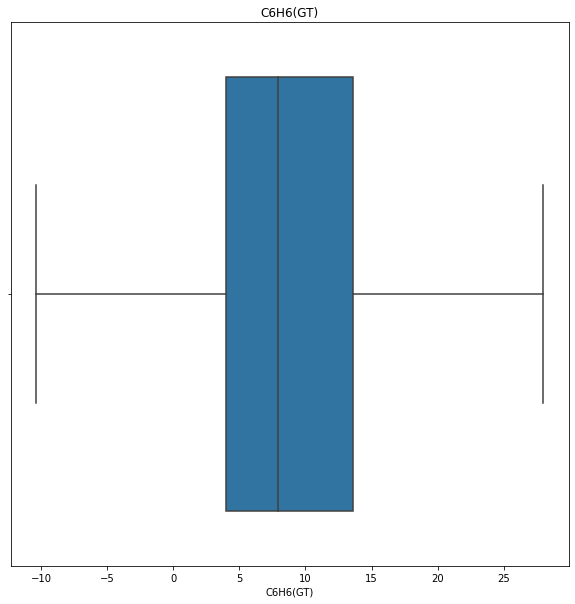

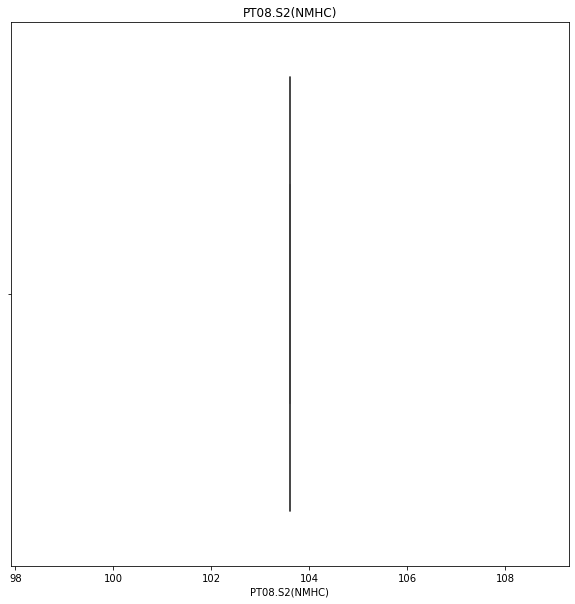

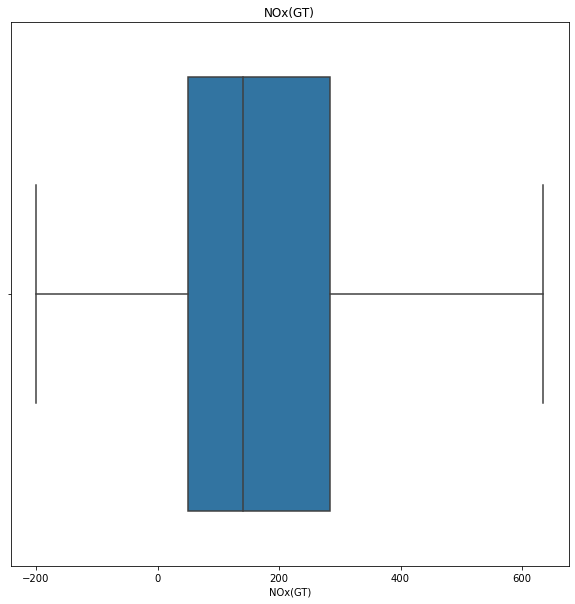

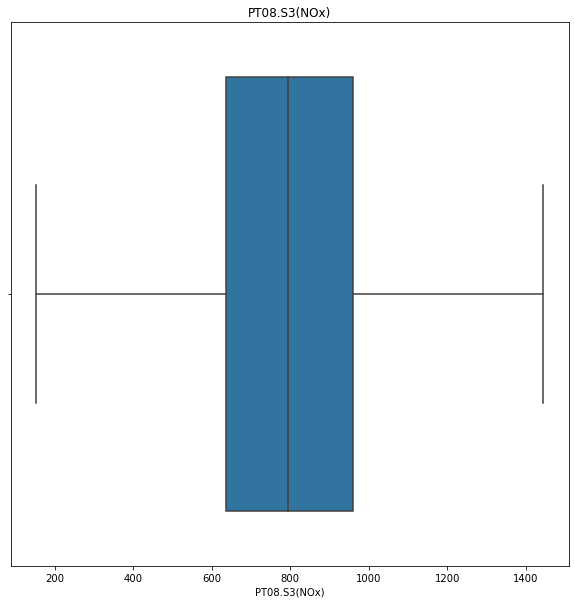

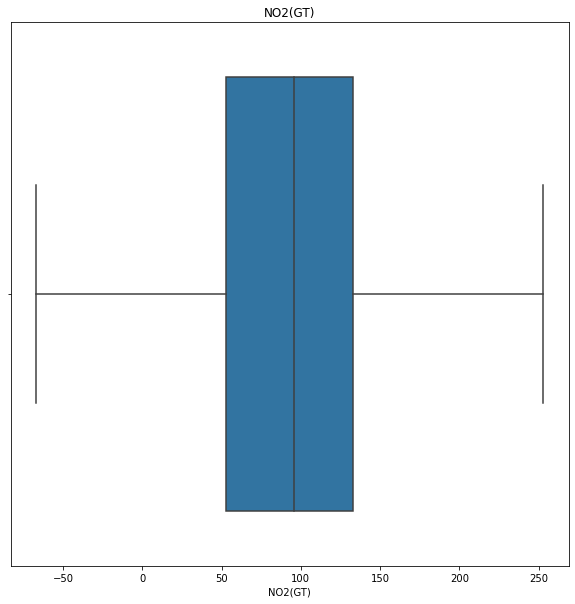

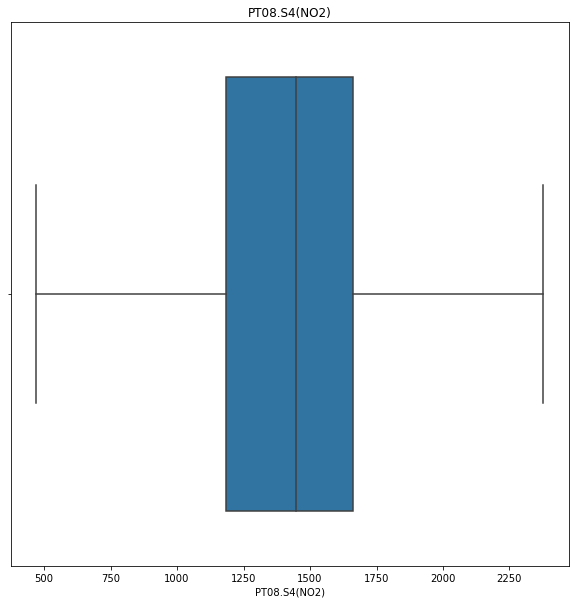

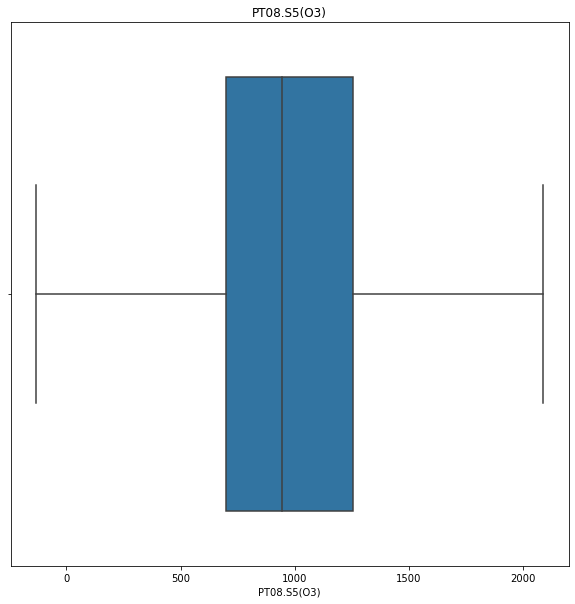

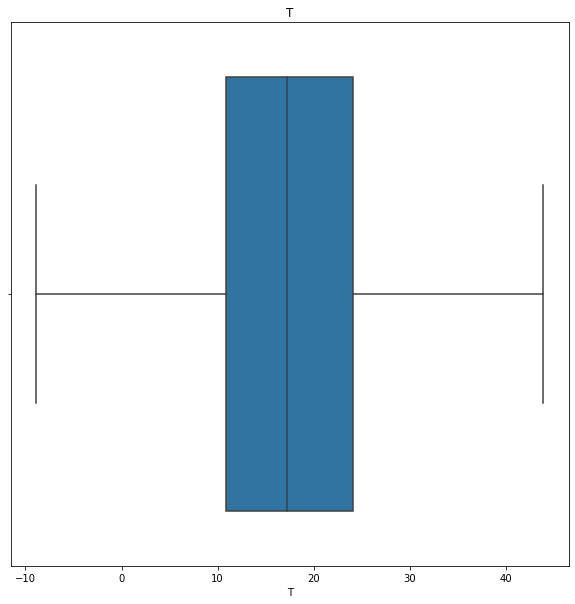

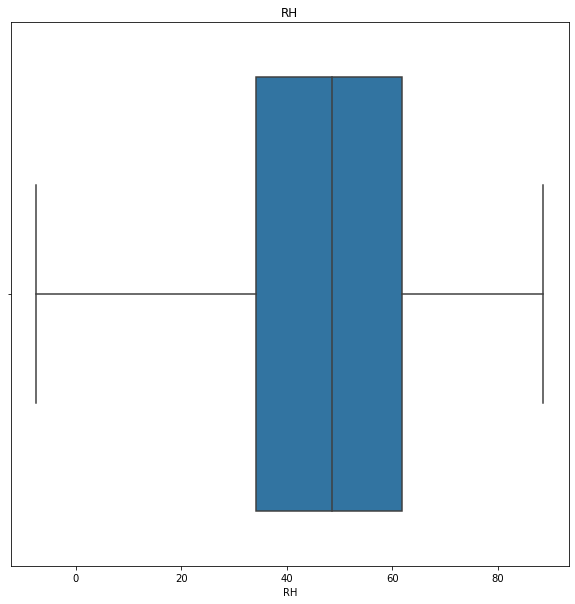

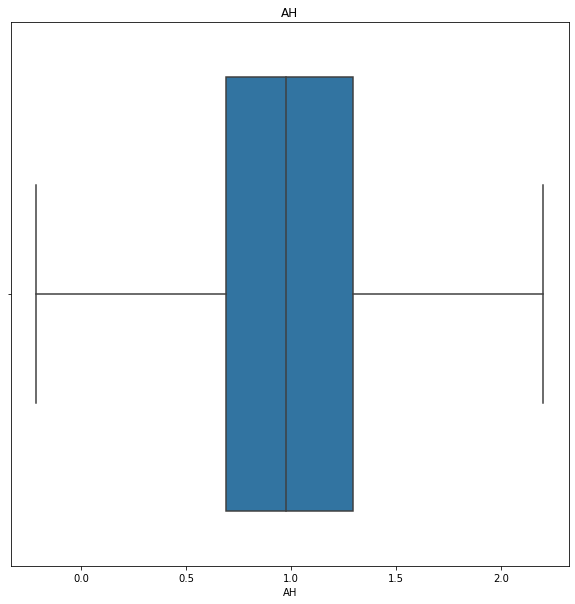

<Figure size 720x720 with 0 Axes>

In [43]:
for feature in numerical_feature:
    df3=df2.copy()
    sns.boxplot(df3[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

CO(GT)


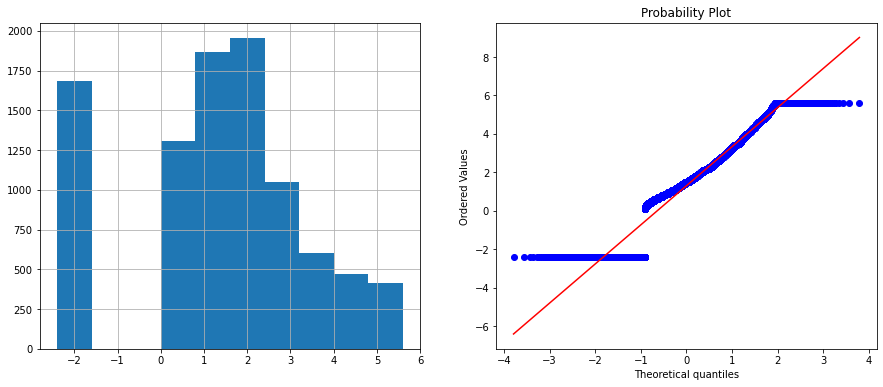

PT08.S1(CO)


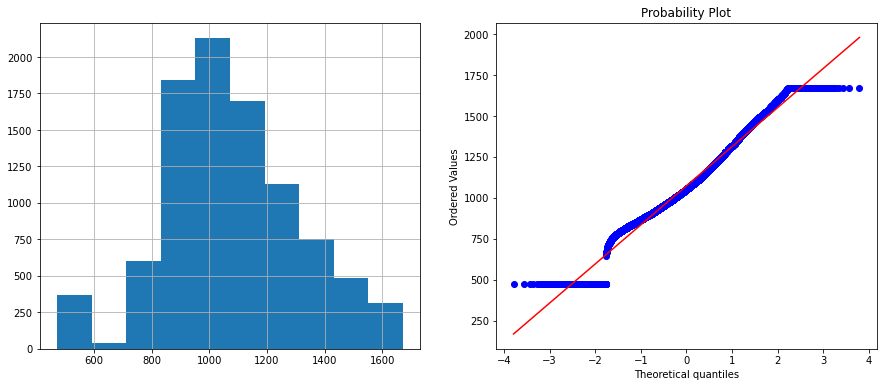

NMHC(GT)


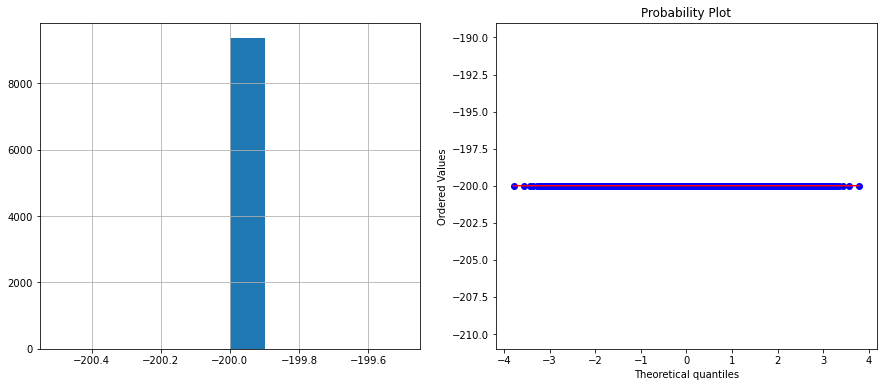

C6H6(GT)


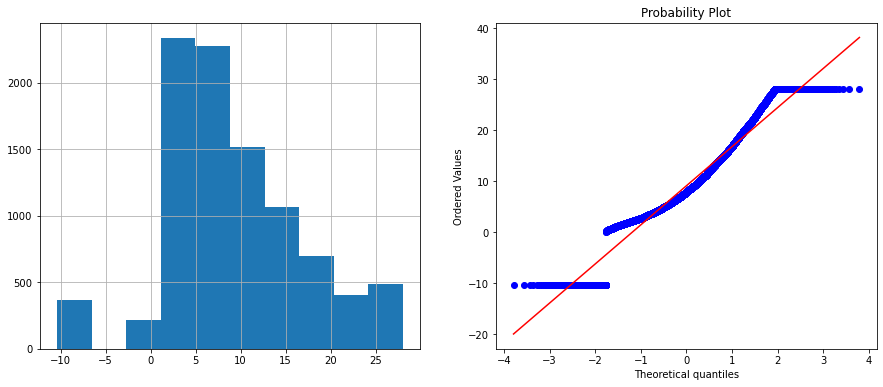

PT08.S2(NMHC)


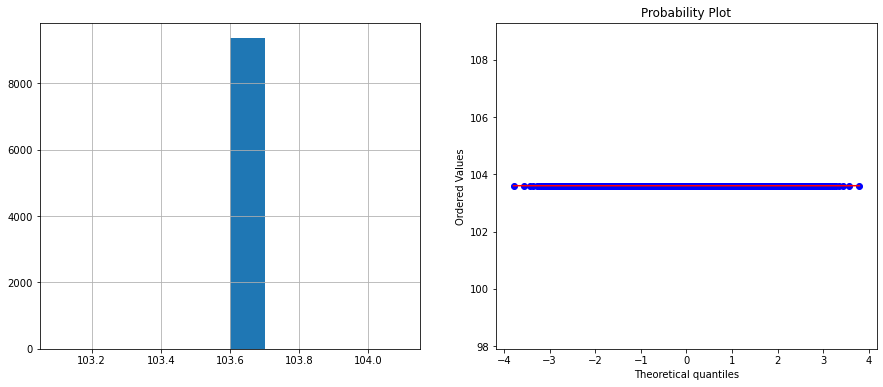

NOx(GT)


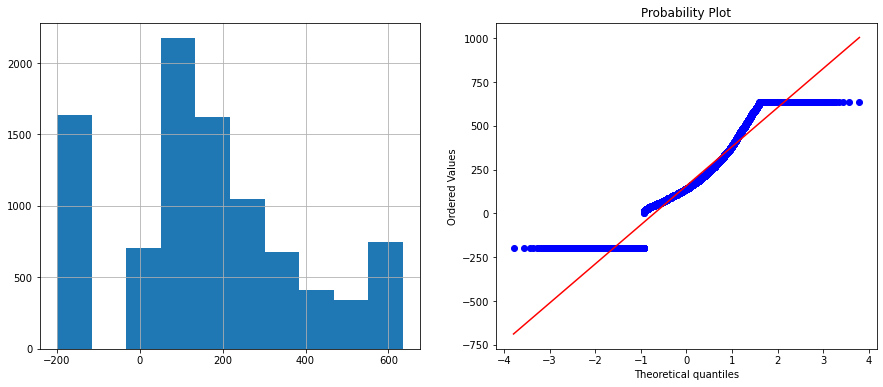

PT08.S3(NOx)


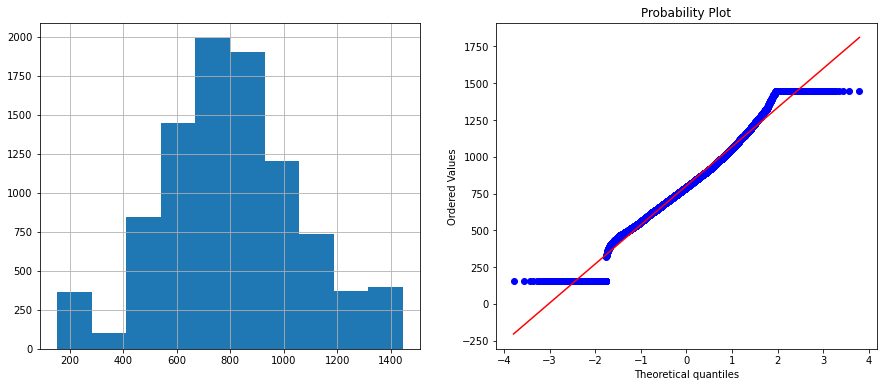

NO2(GT)


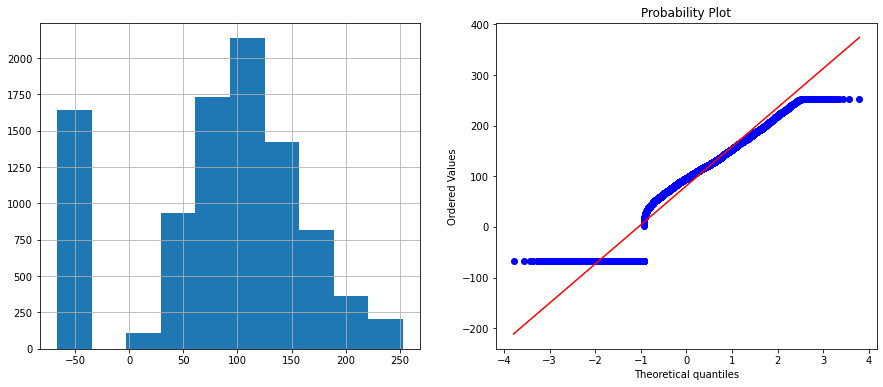

PT08.S4(NO2)


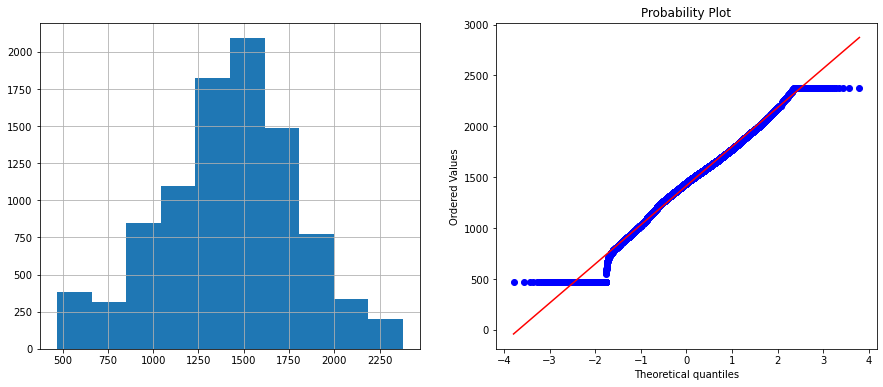

PT08.S5(O3)


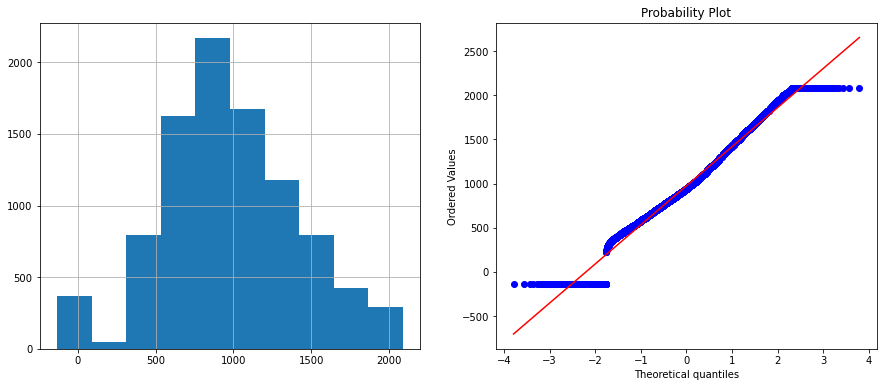

T


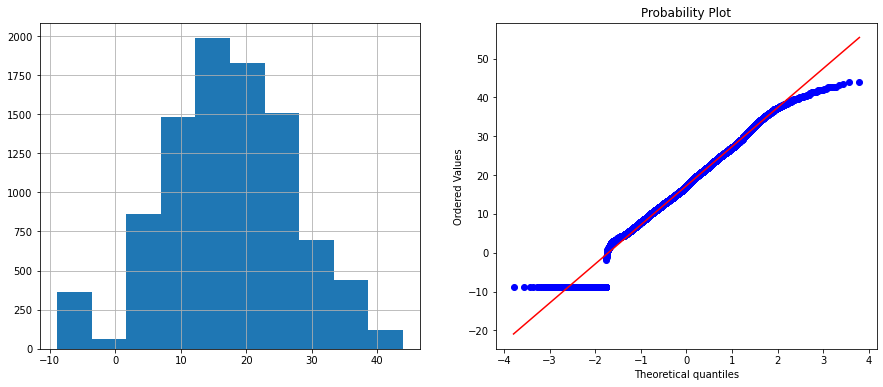

RH


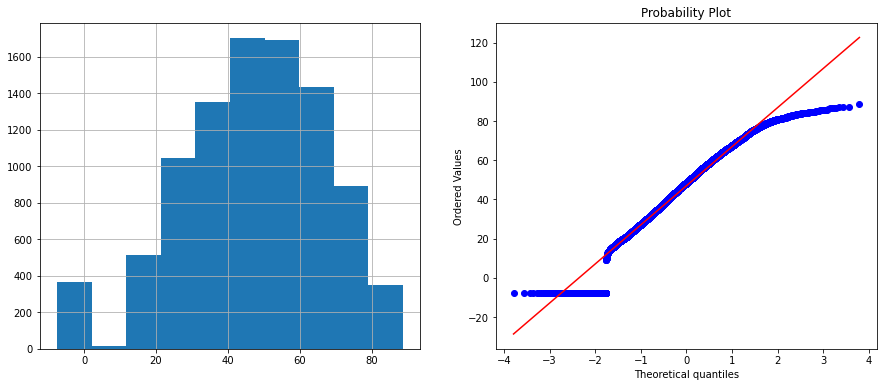

AH


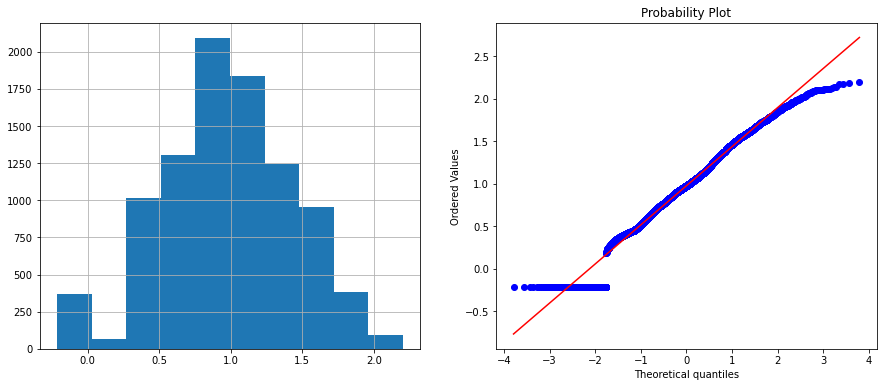

In [44]:
for feature in numerical_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df3[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df3[feature], dist="norm", plot=plt)
    plt.show()

# Feature Selection through ExtraTreeRegressor

In [45]:
df4=df3.drop(['Date','Time'],axis=1)

In [46]:
X = df4.drop('RH',axis=1)
y = df4.RH

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [48]:
print(selection.feature_importances_)

[0.00062668 0.04915293 0.         0.07374479 0.         0.00416526
 0.04282367 0.00410119 0.02935863 0.04331133 0.43198225 0.32073327]


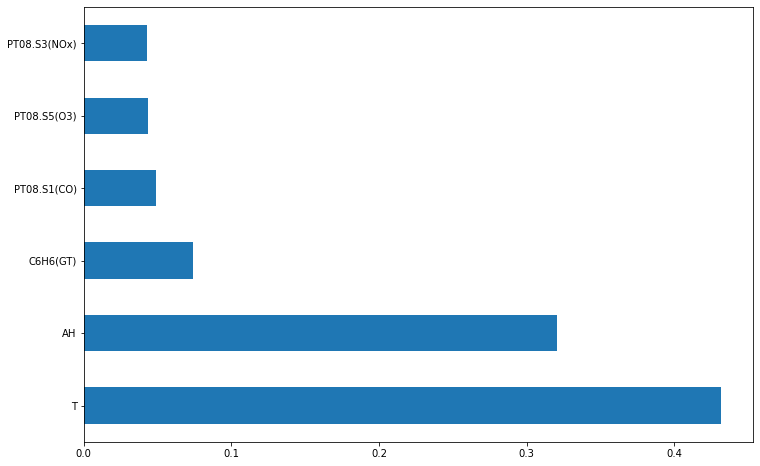

In [49]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()


In [50]:
df5=df4[['T','AH','C6H6(GT)','PT08.S3(NOx)','PT08.S1(CO)','PT08.S5(O3)','RH']]
df5.head()

,T,AH,C6H6(GT),PT08.S3(NOx),PT08.S1(CO),PT08.S5(O3),RH
0,13.6,0.7578,11.9,1056.0,1360.0,1268.0,48.9
1,13.3,0.7255,9.4,1174.0,1292.0,972.0,47.7
2,11.9,0.7502,9.0,1140.0,1402.0,1074.0,54.0
3,11.0,0.7867,9.2,1092.0,1376.0,1203.0,60.0
4,11.2,0.7888,6.5,1205.0,1272.0,1110.0,59.6


# Scaling all the features by StandardScaler method

In [51]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [52]:
df5[['T','AH']]= std.fit_transform(df5[['T','AH']])
df5[['C6H6(GT)','PT08.S3(NOx)']]= std.fit_transform(df5[['C6H6(GT)','PT08.S3(NOx)']])
df5[['PT08.S1(CO)','PT08.S5(O3)']]= std.fit_transform(df5[['PT08.S1(CO)','PT08.S5(O3)']])

df5.head()

,T,AH,C6H6(GT),PT08.S3(NOx),PT08.S1(CO),PT08.S5(O3),RH
0,-0.360327,-0.473577,0.354111,0.942714,1.184300,0.653667,48.9
1,-0.389918,-0.543340,0.035063,1.383158,0.902791,-0.009573,47.7
2,-0.528009,-0.489992,-0.015984,1.256250,1.358173,0.218976,54.0
3,-0.616782,-0.411157,0.009540,1.077087,1.250537,0.508023,60.0
4,-0.597055,-0.406621,-0.335032,1.498868,0.819994,0.299640,59.6


# Splitting independent(~'RH') and dependent('RH') feature

In [53]:
X = df5.drop('RH',axis=1)
Y = df5.RH

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (7485, 6)
Dimension of X_test: (1872, 6)


# Using linear regression to model data

In [55]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()

In [56]:
lnr.fit(X_train,Y_train)
lnr.score(X_test,Y_test)

0.8454442929667993

In [57]:
pred=lnr.predict(X_test)
pred

array([41.85939194, 26.84725867, 50.99775128, ..., 41.46893073,
       55.97971376, 31.01301528])

In [58]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print('R^2: ',metrics.r2_score(Y_test,pred))

RMSE:  7.860539320345067
R^2:  0.8454442929667993


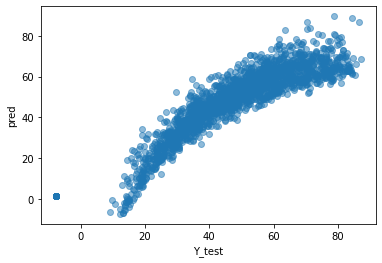

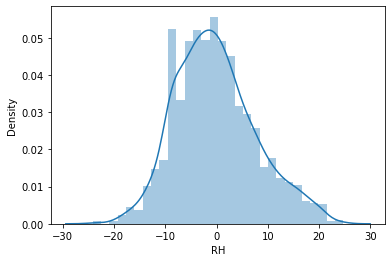

In [59]:
plt.scatter(Y_test, pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("pred")
plt.show()

sns.distplot(Y_test-pred)
plt.show()

# Checking the score of train-test data on different regressor models

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

model = [DecisionTreeRegressor,SVR,RandomForestRegressor,AdaBoostRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,Y_train)
    pred=reg.predict(X_test)
    print(mod)
    print('Accuracy: ',reg.score(X_test,Y_test))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
    print('R^2: ',metrics.r2_score(Y_test,pred))

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
Accuracy:  0.9968869795826645
RMSE:  1.115580221574957
R^2:  0.9968869795826645
<class 'sklearn.svm._classes.SVR'>
Accuracy:  0.9898868746282288
RMSE:  2.010724256000955
R^2:  0.9898868746282288
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Accuracy:  0.9992250605942449
RMSE:  0.556600630660155
R^2:  0.9992250605942449
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
Accuracy:  0.8980175344276278
RMSE:  6.385171626402832
R^2:  0.8980175344276278


# RandomForestRegressor out performs all the regressor model used by having 99.91% accuracy

In [61]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
prediction_dtr = dtr.predict(X_test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,prediction_dtr)))
print('R^2: ',metrics.r2_score(Y_test,prediction_dtr))

RMSE:  1.0854638812999895
R^2:  0.9970527898033703


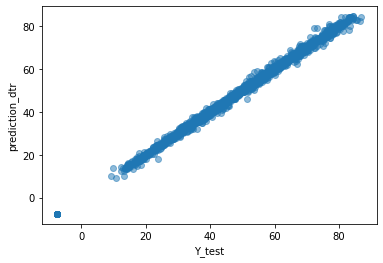

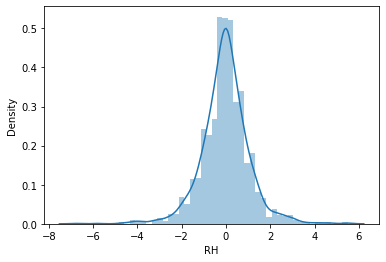

In [62]:
plt.scatter(Y_test, prediction_dtr, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("prediction_dtr")
plt.show()

sns.distplot(Y_test-prediction_dtr)
plt.show()

In [63]:
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
prediction_rfr = rfr.predict(X_test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,prediction_rfr)))
print('R^2: ',metrics.r2_score(Y_test,prediction_rfr))

RMSE:  0.5564711060654297
R^2:  0.9992254212191818


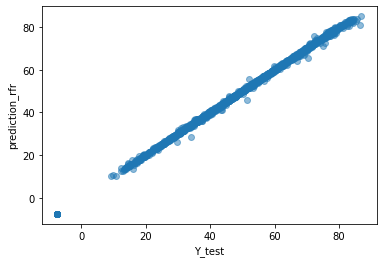

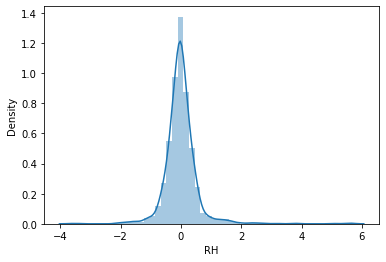

In [64]:
plt.scatter(Y_test, prediction_rfr, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("prediction_rfr")
plt.show()

sns.distplot(Y_test-prediction_rfr)
plt.show()

In [65]:
abr=AdaBoostRegressor()
abr.fit(X_train,Y_train)
prediction_abr = abr.predict(X_test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,prediction_abr)))
print('R^2: ',metrics.r2_score(Y_test,prediction_abr))

RMSE:  6.671803606163732
R^2:  0.8886559883146954


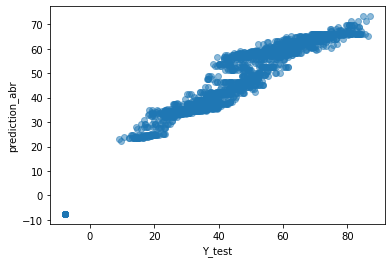

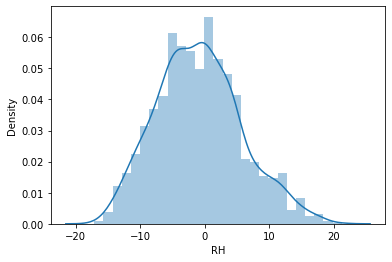

In [66]:
plt.scatter(Y_test, prediction_abr, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("prediction_abr")
plt.show()

sns.distplot(Y_test-prediction_abr)
plt.show()

In [67]:
s=SVR()
s.fit(X_train,Y_train)
prediction_s = s.predict(X_test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,prediction_s)))
print('R^2: ',metrics.r2_score(Y_test,prediction_s))

RMSE:  2.010724256000955
R^2:  0.9898868746282288


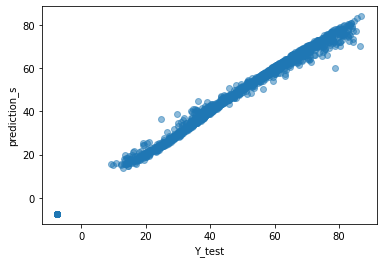

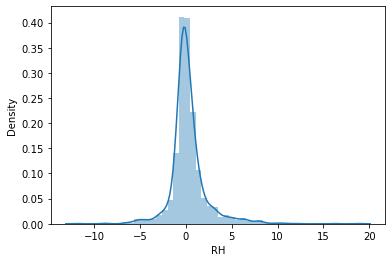

In [68]:
plt.scatter(Y_test, prediction_s, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("prediction_s")
plt.show()

sns.distplot(Y_test-prediction_s)
plt.show()

In [69]:
import pickle
pickle.dump(lnr,open('LinearRegression_model.pkl','wb'))
pickle.dump(dtr,open('DecisionTree_model.pkl','wb'))
pickle.dump(rfr,open('RandomForest_model.pkl','wb'))
pickle.dump(s,open('SVR_model.pkl','wb'))
pickle.dump(abr,open('AdaBoost_model.pkl','wb'))